##MVP Disciplina Engenharia de Sistemas de Software Inteligentes
Aluna :Patricia Fraga Ferreira

PUC RJ - Pos-Graduação em Engenharia de Software

Jun/2025



##Introdução

Este codigo visa desenvolver um modelo de Machine Learning para classificar perfis de personalidade como Extrovertido(a) ou Introvertido(a), com base em respostas a um questionário comportamental.

Os dados foram obtidos de um dataset público disponível no Kaggle, contendo informações sobre hábitos sociais e características pessoais relevantes para a análise da personalidade.

O objetivo do treinamento foi construir um modelo capaz de prever com alta acurácia a classificação do perfil, utilizando técnicas clássicas de aprendizado supervisionado.

A aplicação do modelo é útil em áreas como psicologia, recursos humanos e desenvolvimento pessoal, apoiando processos seletivos, autoconhecimento e aprimoramento de equipes.

##Configuração inicial

In [84]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

## Carga do Dataset

In [85]:
# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/patriciafraga123/machine_learning/ef6453bf8aa598c1fb0df3b00ef943398769795d/personality_datasert.csv"

# Lê o arquivo
dataset = pd.read_csv(url, delimiter=',')

# 2. Converter colunas  ("Yes"/"No") para numérico (0/1)
dataset['Stage_fear'] = dataset['Stage_fear'].map({'Yes': 1, 'No': 0})
dataset['Drained_after_socializing'] = dataset['Drained_after_socializing'].map({'Yes': 1, 'No': 0})

# Mostra as primeiras linhas do dataset
display(dataset.head())

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,0,4.0,6.0,0,13.0,5.0,Extrovert
1,9.0,1,0.0,0.0,1,0.0,3.0,Introvert
2,9.0,1,1.0,2.0,1,5.0,2.0,Introvert
3,0.0,0,6.0,7.0,0,14.0,8.0,Extrovert
4,3.0,0,9.0,4.0,0,8.0,5.0,Extrovert


## Separação em conjunto de treino e conjunto de teste com holdout

In [86]:
# Separando dados em treino e teste (20%) com estratificação para manter proporção das classes

test_size = 0.20 # tamanho do conjunto de teste
seed = 7 # semente aleatória


# Separação em conjuntos de treino e teste
array = dataset.values
X = array[:,0:7]
y = array[:,7]
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y) # holdout com estratificação

# Usando StratifiedKFold para validação cruzada estratificada com 10 partições, garantindo balanceamento das classes

scoring = 'accuracy'
num_particoes = 10
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada com estratificação

## Modelagem e Inferência

### Criação e avaliação de modelos: linha base

KNN: 0.927155 (0.014863)
CART: 0.869397 (0.022894)
NB: 0.934052 (0.015427)
SVM: 0.934483 (0.015755)


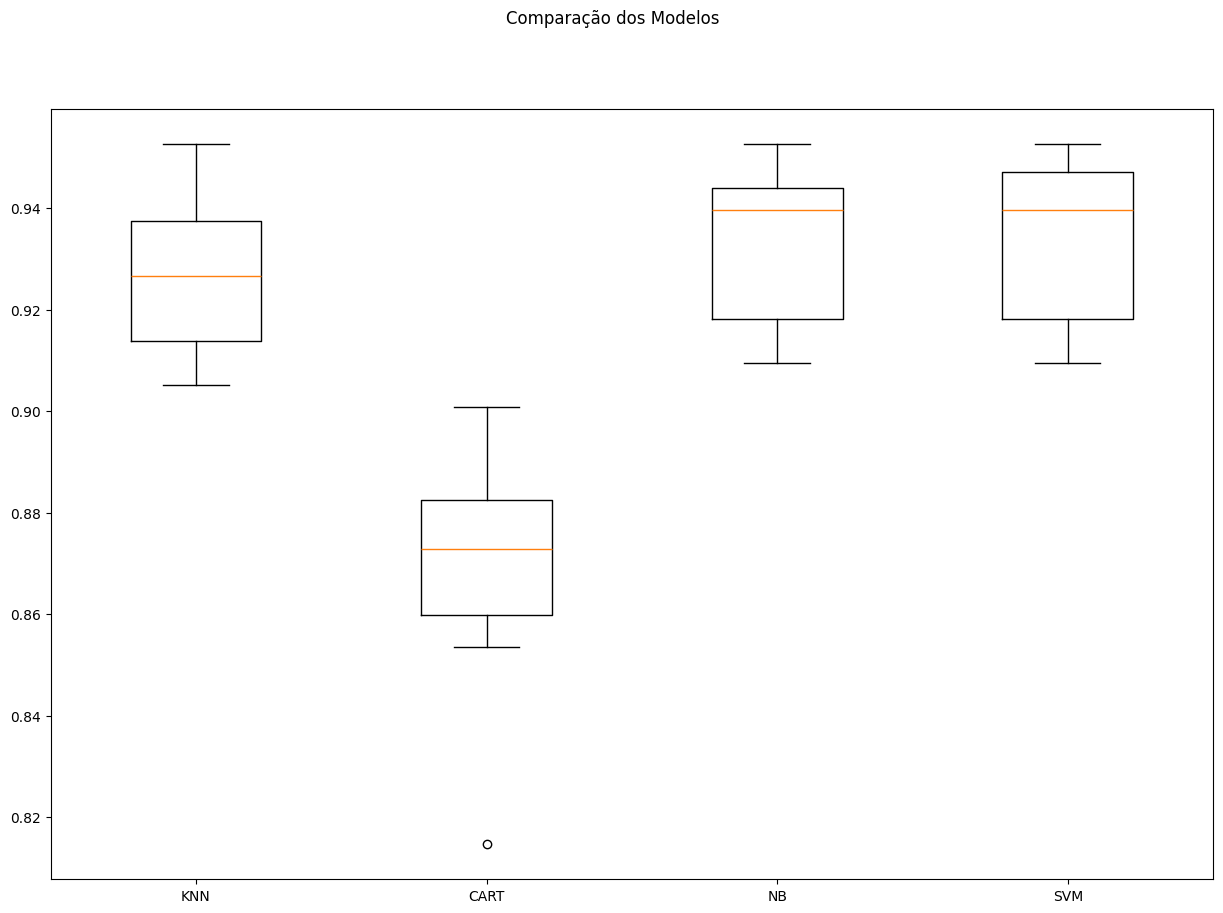

In [87]:
np.random.seed(7) # definindo uma semente global

# Lista que armazenará os modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Listas para armazenar os resultados
results = []
names = []

# Avaliando cada modelo com validação cruzada e armazenando resultados para comparação

for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15,10))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Criação e avaliação de modelos: dados padronizados e normalizados

KNN-orig: 0.927 (0.015)
CART-orig: 0.869 (0.023)
NB-orig: 0.934 (0.015)
SVM-orig: 0.934 (0.016)
KNN-padr: 0.929 (0.016)
CART-padr: 0.872 (0.020)
NB-padr: 0.934 (0.015)
SVM-padr: 0.934 (0.016)
KNN-norm: 0.929 (0.017)
CART-norm: 0.871 (0.023)
NB-norm: 0.934 (0.015)
SVM-norm: 0.934 (0.015)


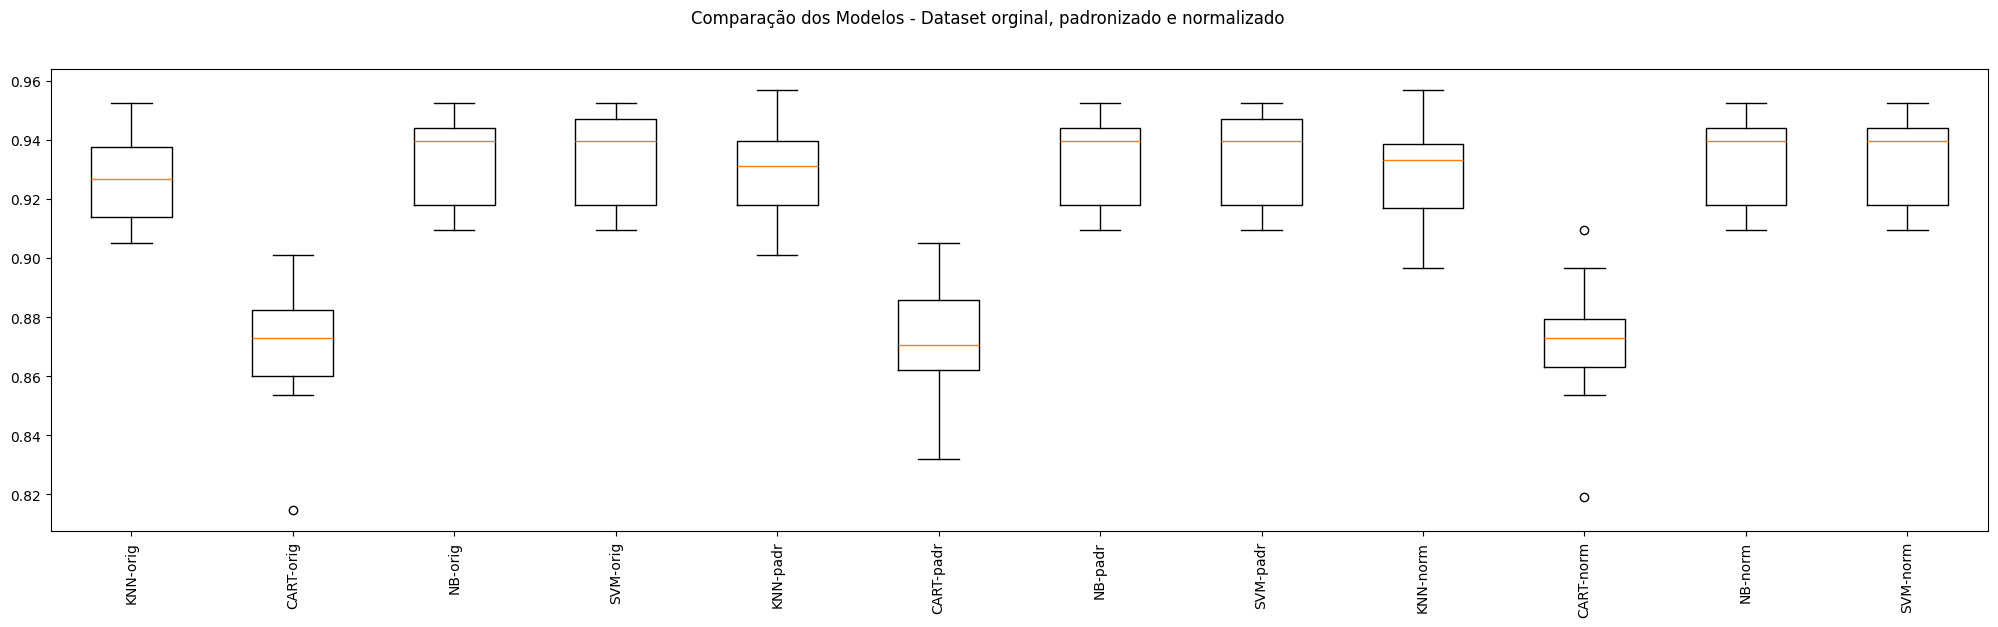

In [88]:
# definindo uma semente global para este bloco
np.random.seed(7)

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []

# Criando os elementos do pipeline

# Algoritmos que serão utilizados
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())


# Montando os pipelines

# Dataset original
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))

# Dataset Padronizado
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))

# Dataset Normalizado
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

### Otimização dos hiperparâmetros

In [89]:
# Ajustando hiperparâmetro 'var_smoothing' do Naive Bayes com GridSearchCV
# para identificar a melhor configuração do modelo


pipelines = []
nb = ('nb', GaussianNB())
standard_scaler = ('standard_scaler', StandardScaler())
min_max_scaler = ('min_max_scaler', MinMaxScaler())

pipelines.append(('nb-orig', Pipeline(steps=[nb])))
pipelines.append(('nb-padr', Pipeline(steps=[standard_scaler, nb])))
pipelines.append(('nb-norm', Pipeline(steps=[min_max_scaler, nb])))

param_grid = {
   'nb__var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]
}


for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold, n_jobs=-1)
    grid.fit(X_train, y_train)
    print(f"Naive Bayes - {name}: Melhor: {grid.best_score_:.3f} usando {grid.best_params_}")


Naive Bayes - nb-orig: Melhor: 0.934 usando {'nb__var_smoothing': 1e-09}
Naive Bayes - nb-padr: Melhor: 0.934 usando {'nb__var_smoothing': 1e-09}
Naive Bayes - nb-norm: Melhor: 0.934 usando {'nb__var_smoothing': 1e-09}


##Finalização do modelo

In [90]:
# Treinamento com os dados originais (sem padronização/normalização)
model = GaussianNB(var_smoothing=1e-09)
model.fit(X_train, y_train)

# Avaliação no conjunto de teste
predictions = model.predict(X_test)
print("Acurácia no conjunto de teste:", accuracy_score(y_test, predictions))

Acurácia no conjunto de teste: 0.9344827586206896


Matriz de Confusão:
[[271  27]
 [ 11 271]]


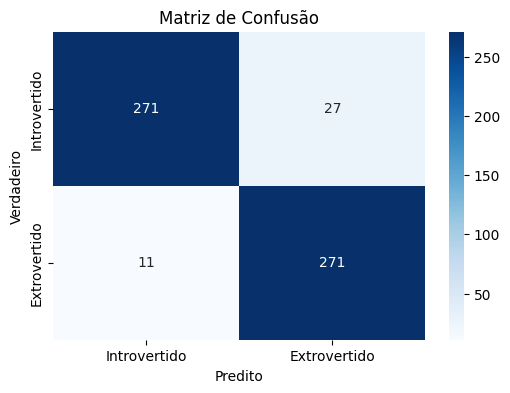

Relatório de Classificação:
              precision    recall  f1-score   support

Introvertido       0.96      0.91      0.93       298
Extrovertido       0.91      0.96      0.93       282

    accuracy                           0.93       580
   macro avg       0.94      0.94      0.93       580
weighted avg       0.94      0.93      0.93       580



In [91]:
# Matriz de Confusão e Relatório de Classificação
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, predictions)
print("Matriz de Confusão:")
print(cm)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Introvertido', 'Extrovertido'], yticklabels=['Introvertido', 'Extrovertido'])
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão')
plt.show()

print("Relatório de Classificação:")
print(classification_report(y_test, predictions, target_names=['Introvertido', 'Extrovertido']))


In [92]:
# Preparação do modelo final com dados de treino
model_final = GaussianNB(var_smoothing=1e-09)
model_final.fit(X_train, y_train)

GaussianNB()

## Simulando a aplicação do modelo em dados não vistos

In [93]:
data = {
    'Time_spent_Alone': [2, 11, 1, 3, 5],
    'Stage_fear': [1, 1, 1, 1, 1],
    'Social_event_attendance': [6, 2, 10, 8, 4],
    'Going_outside': [7, 3, 7, 7,6],
    'Drained_after_socializing': [0, 0, 0, 0, 0],
    'Friends_circle_size': [3, 3, 8, 6,2],
    'Post_frequency': [0,0, 7, 3, 2],
}

atributos = [
    'Time_spent_Alone',
    'Stage_fear',
    'Social_event_attendance',
    'Going_outside',
    'Drained_after_socializing',
    'Friends_circle_size',
    'Post_frequency',
]

entrada = pd.DataFrame(data, columns=atributos)

array_entrada = entrada.values
X_entrada = array_entrada[:, 0:len(atributos)].astype(float)

print(X_entrada)

[[ 2.  1.  6.  7.  0.  3.  0.]
 [11.  1.  2.  3.  0.  3.  0.]
 [ 1.  1. 10.  7.  0.  8.  7.]
 [ 3.  1.  8.  7.  0.  6.  3.]
 [ 5.  1.  4.  6.  0.  2.  2.]]


In [94]:
# Predição de classes dos dados de entrada
saidas = model_final.predict(X_entrada)
print(saidas)

['Extrovert' 'Introvert' 'Extrovert' 'Extrovert' 'Introvert']


##Exportando o modelo

In [95]:
import pickle

pickle_out = open('modelo_nb.pkl', 'wb')  # cria o arquivo
pickle.dump(model_final, pickle_out)      # salva o modelo
pickle_out.close()                        # fecha o arquivo


##Análise dos Resultados



Foram avaliados diferentes algoritmos de classificação aplicados a um conjunto de dados estruturado. Os modelos testados incluíram KNN, Decision Tree (CART), Naive Bayes (GaussianNB) e Support Vector Machine (SVM), combinados com três estratégias de pré-processamento: dados originais, padronizados e normalizados.

A avaliação foi feita por meio de validação cruzada estratificada (Stratified K-Fold), garantindo estimativas confiáveis de desempenho. Os modelos Naive Bayes e SVM apresentaram os melhores resultados, com acurácia média de 93,4% e baixa variabilidade. Entretanto, o SVM demonstrou alto custo computacional, especialmente na etapa de tuning com GridSearchCV.

Diante disso, o modelo Naive Bayes com dados originais foi escolhido como solução final, por manter excelente desempenho com um pipeline mais simples e eficiente.

A acurácia no conjunto de teste foi de 93%, reforçando a consistência do modelo. A análise do relatório de classificação mostrou F1-score de 0.93 para ambas as classes (introvertido e extrovertido), indicando equilíbrio no desempenho. A matriz de confusão revelou que o modelo previu corretamente 96% dos extrovertidos e 91% dos introvertidos, com alta precisão e cobertura, sem indícios de viés relevante.

##Conclusão Final


Este projeto teve como objetivo aplicar os conceitos de Machine Learning aprendidos na disciplina de Engenharia de Sistemas de Software Inteligentes para resolver um problema real de classificação de perfis de personalidade. Ao longo do processo, foram seguidas as principais etapas de um pipeline estruturado de ML:

- Carga e preparação dos dados;
- Conversão de variáveis categóricas;
- Divisão em treino e teste com holdout estratificado;Comparação de algoritmos clássicos (KNN, CART, Naive Bayes e SVM), com e sem transformações (normalização e padronização);
- Validação cruzada estratificada, assegurando uma avaliação robusta;
- Tuning de hiperparâmetros com GridSearchCV;
- Avaliação final com métricas completas e matriz de confusão;
- Exportação do modelo final com pickle, permitindo reuso e integração.
